# Dr. Semmelweis and the Discovery of Handwashing
## Introduction

<p>In the early 1840s at the Vienna General Hospital many of the women giving birth were dying from childbed fever. The cause of this condition was that the doctors delivering the babies didn't disinfect their hands properly.</p>
<p>In this notebook, we're going to analyze the data about the death cases in every of the two clinics at the hospital, before and after handwashing was introduced.</p>

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [3]:
# Print out the first 5 rows of the dataset.
print(yearly.head())

   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1


## The proportion of deaths at the two clinics

In [4]:
# Calculate the proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract Clinic 1 data into clinic_1 and Clinic 2 data into clinic_2
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out clinic_1
print(clinic_1.head())

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015


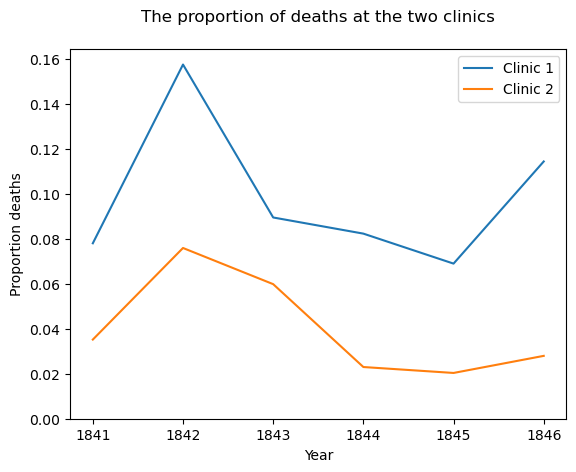

In [5]:
# Plot yearly proportion of deaths at the two clinics
# Lineplot for clinic 1
ax = clinic_1.plot(kind = 'line', 
                   x = 'year', 
                   y = 'proportion_deaths', 
                   label = 'Clinic 1')

# Lineplot for clinic 2
clinic_2.plot(kind = 'line', 
              x = 'year', 
              y = 'proportion_deaths', 
              label = 'Clinic 2', 
              ax = ax, 
              ylabel = "Proportion deaths", 
              xlabel = "Year")

plt.title("The proportion of deaths at the two clinics", pad = 20)

ax.set_ylim(ymin=0)

plt.show()

## The handwashing begins
<p>It turned out that the proportion of deaths in Clinic 1 was much higher than in Clinic 2 every year. The reason for that was that medical students served at Clinic 1. They helped women giving birth and also spent time in the autopsy room examining corpses.</p>

<p>Let's examine the monthly death rates in Clinic 1 and analyze how the death rates changed over time.</p>

In [6]:
# Importing dataset
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates = ['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


Text(0.5, 1.0, 'Monthly proportion of deaths at Clinic 1')

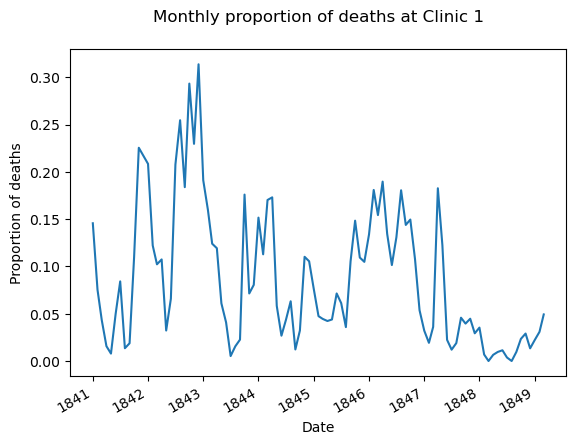

In [7]:
# Plot monthly proportion of deaths
monthly.plot(x = 'date', 
             y = 'proportion_deaths', 
             ylabel = "Proportion of deaths",
             xlabel = "Date",
             legend = None)

plt.title('Monthly proportion of deaths at Clinic 1', 
          pad = 20)

A significant decrease in the death cases in Clinic 1 can be observed somewhere between 1847 and 1848.

## The effect of handwashing highlighted
<p>Dr. Ignaz Semmelweis, who was working at the hospital at that time, proposed the practice of washing hands in the summer of 1847.</p>
<p>The effect of handwashing on the death cases at Clinic 1 can be seen on the next lineplot.</p>

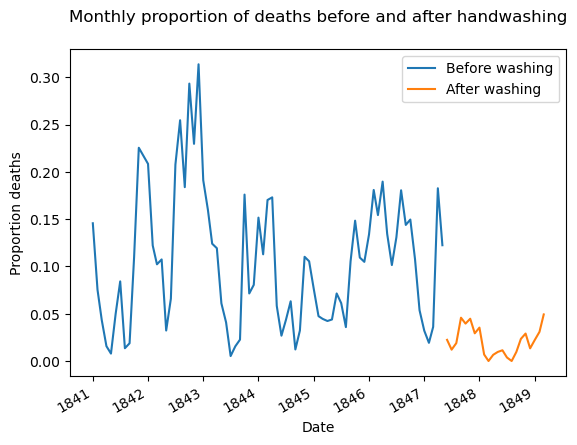

In [8]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x = 'date', 
                         y = 'proportion_deaths', 
                         ylabel = "Proportion deaths", 
                         label = 'Before washing')

after_washing.plot(x = 'date', 
                   y = 'proportion_deaths', 
                   ax = ax, 
                   label = 'After washing', 
                   xlabel = "Date")
                   
plt.title("Monthly proportion of deaths before and after handwashing", pad = 20)
plt.show()

In [9]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

## A bootstrap analysis of Semmelweis handwashing data
<p>To have an idea by how much the handwashing reduces mortality, a bootstrap analysis must be conducted.</p>
<p>It can be interpreted as creating a population of clinics which introduced the handwashing in 1847.</p>

In [10]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_washing.sample(frac = 1, replace = True)['proportion_deaths']
    boot_after = after_washing.sample(frac = 1, replace = True)['proportion_deaths']
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
boot_mean_diff = pd.Series(boot_mean_diff)
confidence_interval = boot_mean_diff.quantile([0.025, 0.975])
confidence_interval

0.025   -0.10113
0.975   -0.06744
dtype: float64